# Multiple linear regression

### Predicting Prices of Boston Housing Values

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

We are going to use sample dataset from sklearn.datasets. 

In [3]:
from sklearn.datasets import load_boston

### Load and Asess the Boston Housing data set from sklearn

In [6]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [7]:
print(boston.data.shape)

(506, 13)


The boston dataset contains the following features 

In [8]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Now, lets convert boston.data into pandas data frame

In [9]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


## Describing the Data Set

In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

boston.target contains the housing prices 

## Setting up our Housing Data for Linear Regression Analysis

Create a variable called PRICE which will contain the prices.
This information is contained in the target data, what we want to predict using the linear model.

In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
bos.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Exploring this data set. First, use describe() to get basic summary statistics for each of the columns.

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Building the Regression Model

In this section we are going to select a model which will suite our problem/solution.

### Step 1: Checking for Linearity - Scatterplots

We are going to use Scatter plots to find the best match. 

Using scatter plots, let's take a look into the relationships between the variables and price. In order to create a linear model, the predictors or features that we use must have a linear relationship to price.

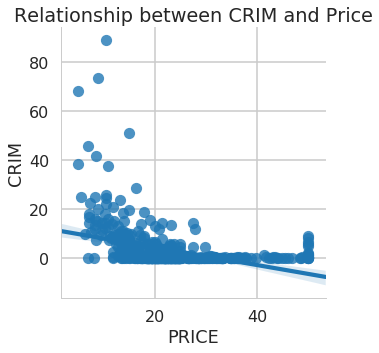

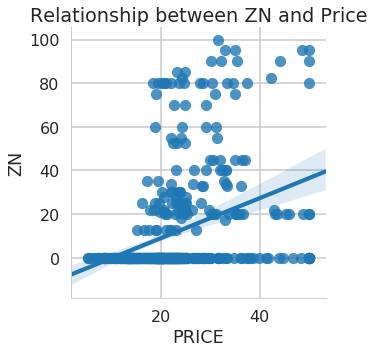

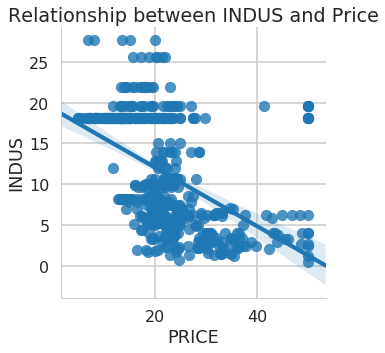

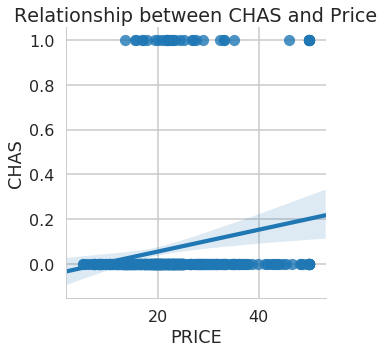

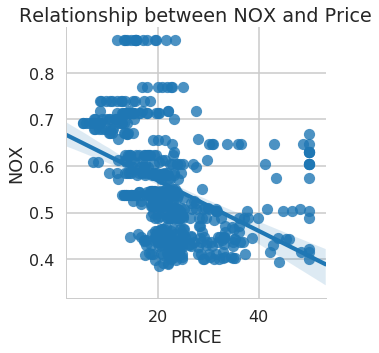

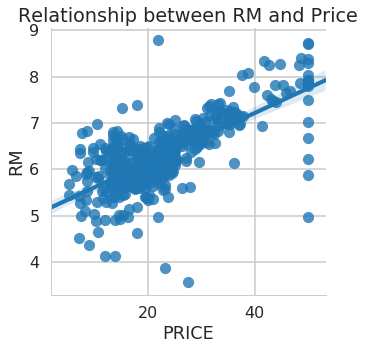

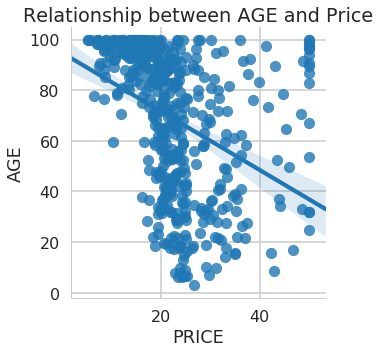

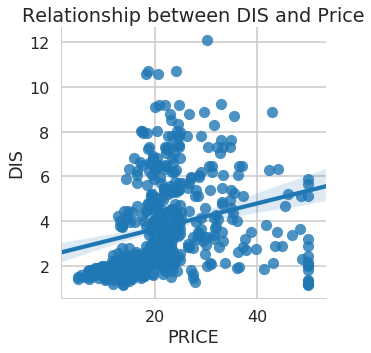

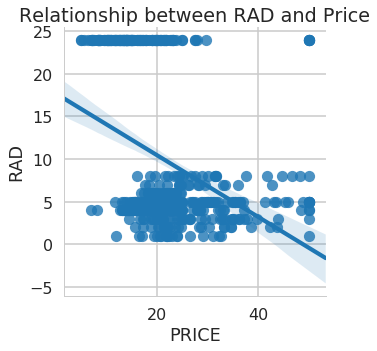

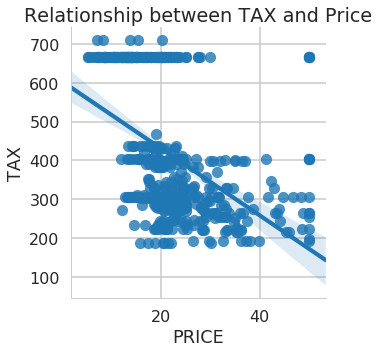

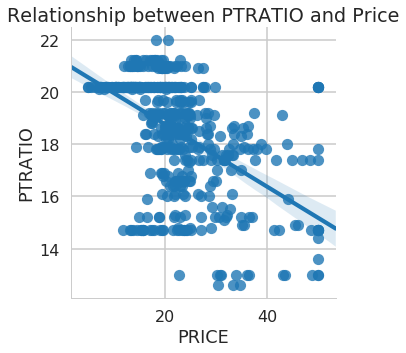

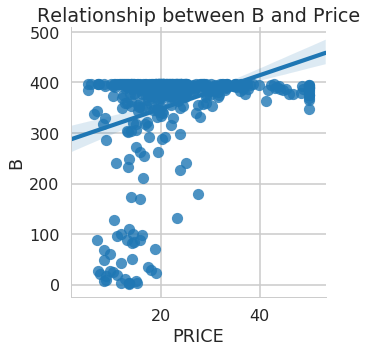

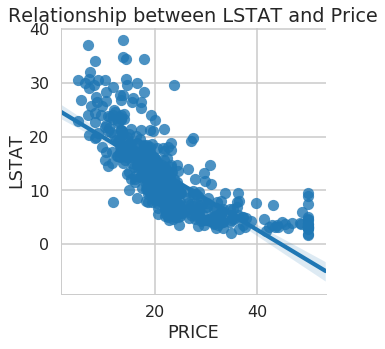

In [11]:
for b in bos:
    xaxis = "PRICE"
    if(xaxis != b):
        sns.lmplot(y=b, x="PRICE", data=bos, fit_reg = True)
        plt.title("Relationship between %s and Price" %b)

Based on the above graphs, we can club the features in two category, 
- Strong Possible Predictors:
- Weaker Possible Predictors:

#### Strong Possible Predictors:

These features have string relationships to price exemplified by a small, tight distribution of data around the line of best fit extimated by the plot.

- Number of Rooms (RM)
- % of Lower Status Population (LSTAT)
- Nitrus Oxide Concentration (in parts per 10 million) (NOX)
- Weighted Distance from 5 Major Employment Centers (DIS)

Text(0.5,1,'Relationship between RM and Price')

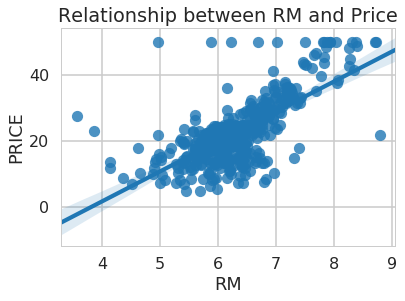

In [14]:
# Number of Rooms 
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
plt.title("Relationship between RM and Price")

Text(0.5,1,'Relationship between LSTAT and Price')

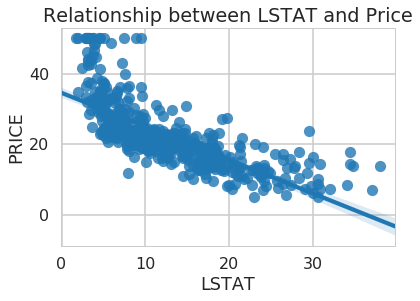

In [15]:
# % of Lower Status Population
sns.regplot(y="PRICE", x="LSTAT", data=bos, fit_reg = True)
plt.title("Relationship between LSTAT and Price")

Text(0.5,1,'Relationship between NOX and Price')

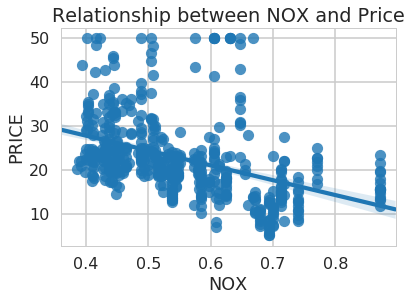

In [16]:
# Nitrus Oxide Concentration (in parts per 10 million)
sns.regplot(y="PRICE", x="NOX", data=bos, fit_reg = True)
plt.title("Relationship between NOX and Price")

Text(0.5,1,'Relationship between DIS and Price')

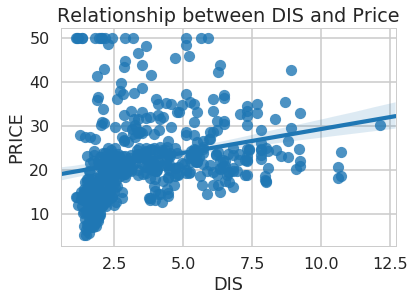

In [17]:
# Weighted Distance from 5 Major Employment Centers
# Strong positive coorelation, the closer/further the town is from employment centers, the higher/lower the housing price.
sns.regplot(y="PRICE", x="DIS", data=bos, fit_reg = True)
plt.title("Relationship between DIS and Price")

### Weaker (still decent) Possible Predictors:

These features have string relationships to price exemplified by a small, tight distribution of data around the line of best fit extimated by the plot.

Text(0.5,1,'Relationship between PTRATIO and Price')

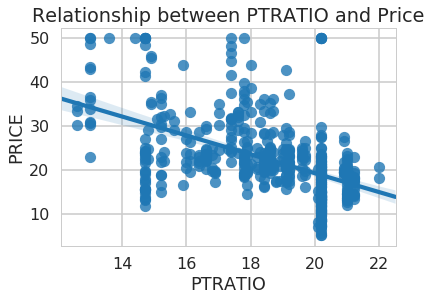

In [19]:
# Pupil Teacher Ratio in schools/college
sns.regplot(y="PRICE", x="PTRATIO", data=bos, fit_reg = True)
plt.title("Relationship between PTRATIO and Price")

Text(0.5,1,'Relationship between Crime Rate and Price')

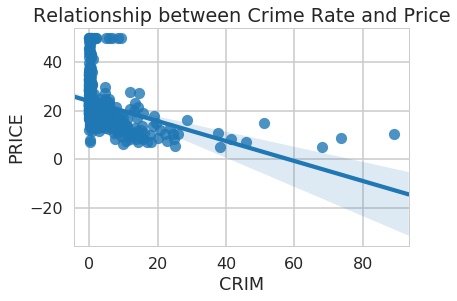

In [20]:
# Crime Rate
sns.regplot(y="PRICE", x="CRIM", data=bos, fit_reg = True)
plt.title("Relationship between Crime Rate and Price")

## Step 2: Checking for Normality: Histograms

We have now found most common possible variables which can impact the price. Now lets normalize any variable to make its values normally distributed along with line.

In the above graphs we found that relationship between crime rate and price is not normalised. Logging of the data helps in normalizing it and eliminates any skew in the distribution to make patterns more visible and data more interprettable.

### Adjusting the Crime Rate Feature

When we look at our Crime Rate and Price graph, we see it exhibits exponential decay. This can be coorected by taking it's log so that it has a linear relationship with price.

Text(0.5,1,'Relationship between Crime Rate and Price')

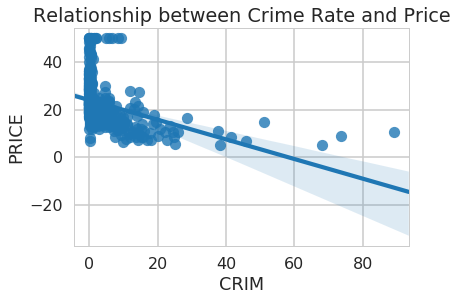

In [22]:
# Crime Rate
sns.regplot(y="PRICE", x="CRIM", data=bos, fit_reg = True)
plt.title("Relationship between Crime Rate and Price")

Text(0.5,1,'Adjusted Crime Rate vs. Original Prices')

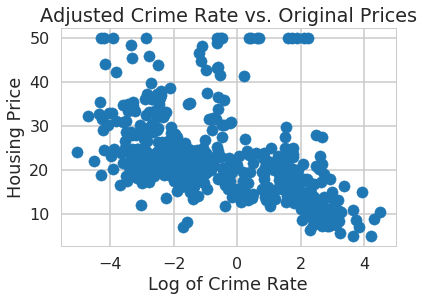

In [24]:
x = np.log(bos.CRIM)
plt.scatter(x, bos.PRICE)

plt.xlabel("Log of Crime Rate")
plt.ylabel("Housing Price")
plt.title("Adjusted Crime Rate vs. Original Prices")

#### update dataframe

Lets update the dataframe with our findings from normalization

In [17]:
bos1 = bos
bos1['CRIM'] = np.log(bos['CRIM'])

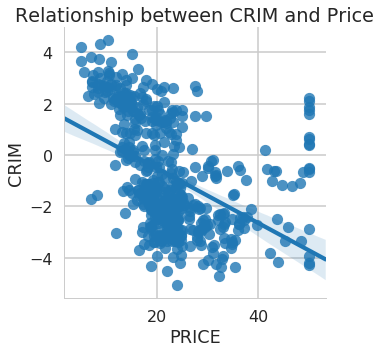

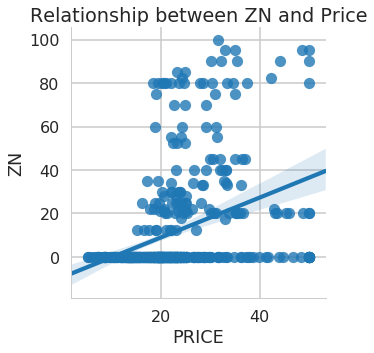

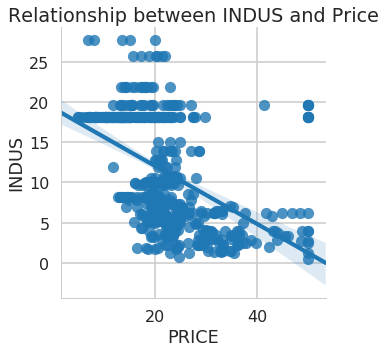

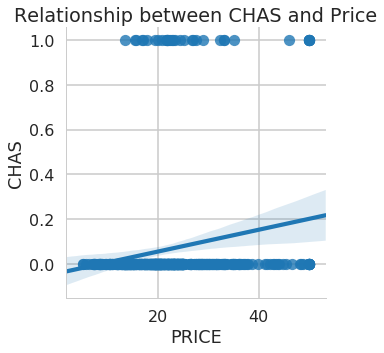

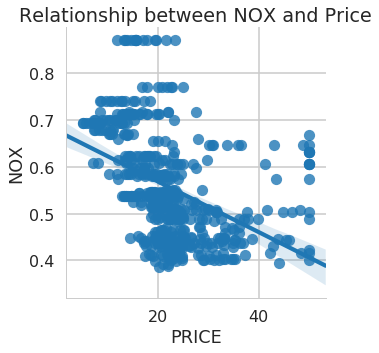

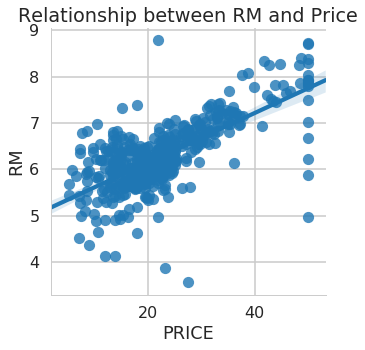

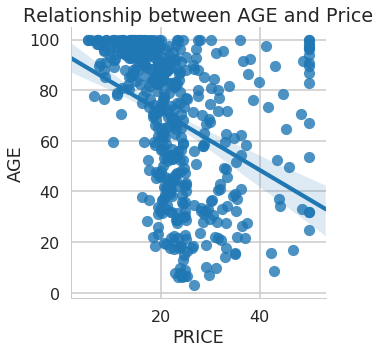

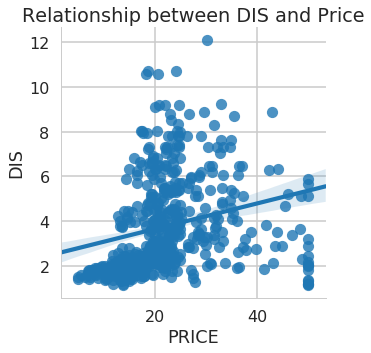

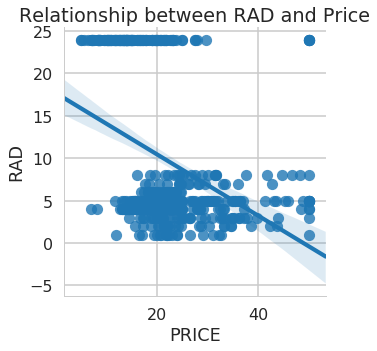

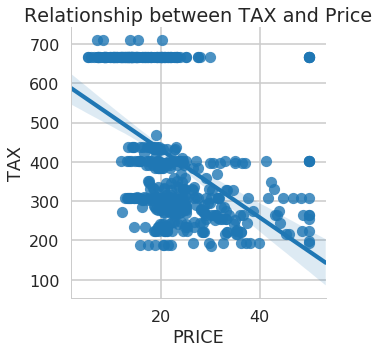

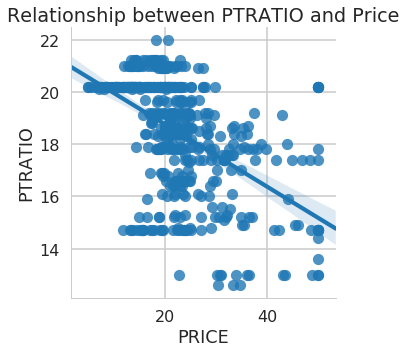

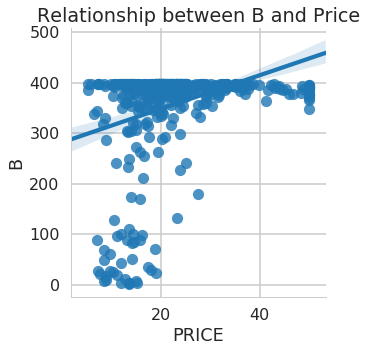

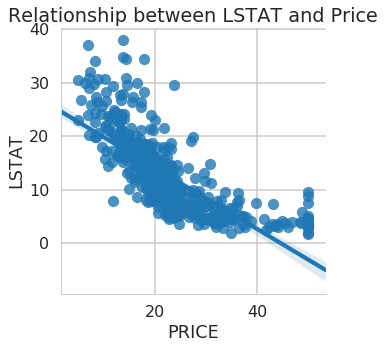

In [18]:
for b in bos1:
    xaxis = "PRICE"
    if(xaxis != b):
        sns.lmplot(y=b, x="PRICE", data=bos1, fit_reg = True)
        plt.title("Relationship between %s and Price" %b)

In [19]:
from sklearn.linear_model import LinearRegression
X = bos1.drop("PRICE", axis = 1)
Y = bos1['PRICE']
lr = LinearRegression()
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


### Fitting the Model 

In [20]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Part 3: Checking for coorelation between our Features- Coorelation Matrix

In [21]:
df = bos1.iloc[:, [0,4,5,7,10,12]]
df.corr()

,CRIM,NOX,RM,DIS,PTRATIO,LSTAT
CRIM,1.000000,0.786196,-0.308210,-0.681142,0.388318,0.623891
NOX,0.786196,1.000000,-0.302188,-0.769230,0.188933,0.590879
RM,-0.308210,-0.302188,1.000000,0.205246,-0.355501,-0.613808
DIS,-0.681142,-0.769230,0.205246,1.000000,-0.232471,-0.496996
PTRATIO,0.388318,0.188933,-0.355501,-0.232471,1.000000,0.374044
LSTAT,0.623891,0.590879,-0.613808,-0.496996,0.374044,1.000000


In [22]:
from statsmodels import api as sm
from statsmodels.formula.api import ols

/home/mayank/.local/lib64/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
bos1 = bos
bos1['CRIM'] = np.log(bos1['CRIM'])

/home/mayank/.local/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [24]:
m = ols('PRICE ~ PTRATIO + NOX + RM + LSTAT + DIS ',bos1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Mon, 20 Nov 2017   Prob (F-statistic):          3.67e-131
Time:                        19:35:44   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.0

### Interpreting coefficients

There is a ton of information in this output.We concentrate on the coefficient table (middle table).

* We begin interpretting the coefficients by first noticing that the p-value (under P>|t|) is so small, basically zero. This means that our selected features are a statistically significant predictor of PRICE.

<p><strong>In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."</strong></p>
<p><strong>On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0. Our $\hat{\beta}_0$ is $\$23,000$.</strong></p>
<p><strong>Lets look at our three most significant regression coefficients:</strong></p>
On the other hand, the interpretation for the intercept,  β^0β^0  is the average of  yy  given that all of the independent variables  xixi  are 0. Our  β^0β^0  is  $23,000$23,000 .

Lets look at our three most significant regression coefficients:

* The LARGEST regression coefficient is for RM of 4.2933 means that on average, each additional room is associated with an increase of  $4,300$4,300  in house price net of the other variables. The confidence interval gives us a range of plausible values for this average change, about ( $3,400,$5,128$3,400,$5,128 ). That's a lot of money for each additional room!

* Another significant feature, indicated by a high regression coefficient, is PTRATIO's of -.9256. This means that on average, each point increase in PTRATIO is associated with an decrease of  $925$925  in house price net of the other variables. The confidence interval gives us a range of plausible values for this average change, about ( $692,$1,159$692,$1,159 ).

* Our third most significant feature, is DIS's of -.6926. This means that on average, each increase in DIS is associated with an decrease of  $692$692  in house price net of the other variables. The confidence interval gives us a range of plausible values for this average change, about ( $398,$998$398,$998 ).

### Predicting Prices

Now we have found all the main features which We are going to find the prices using `lr.predict`.

In [25]:
# X = 10
print(lr.predict(X)[0:10])

[ 29.21027077  24.66412192  30.45687479  28.64256257  28.17910864
  25.1227498   22.61127358  19.07451866  10.80044022  18.65262415]


lets find the difference between actual price and prediction using a graph

Text(0.5,1,'Actual Vs Predicted proces')

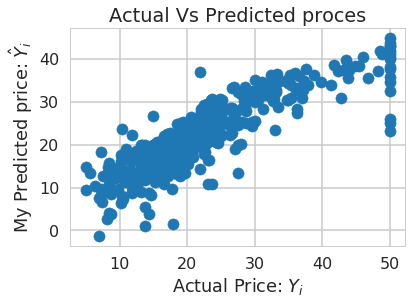

In [26]:
plt.scatter(bos.PRICE, lr.predict(X))
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("My Predicted price: $\hat{Y}_i$")
plt.title("Actual Vs Predicted proces")

In [37]:
mseTotal = np.mean((bos.PRICE - lr.predict(X)) **2)
print(mseTotal)

22.2864848237


In [27]:
lr = LinearRegression()
lr.fit(X[['PTRATIO']], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
msePTR = np.mean((bos.PRICE - lr.predict(X[['PTRATIO']])) **2)
print(msePTR)

62.6522000138


### Training and validation data sets

We are going to split the data sets into training and test data sets in order to train our model on training data and check its performance against test data. 

In [40]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]
print(X_train.shape)

(456, 13)


Reference
1. http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html 

Hollywood Movies(mlr04)

The data (X1, X2, X3, X4) are for each movie
X1 = first year box office receipts/millions
X2 = total production costs/millions
X3 = total promotional costs/millions
X4 = total book sales/millions
